In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("athlete_events - athlete_events.csv")

In [5]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [7]:
df.shape

(271116, 15)

In [8]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

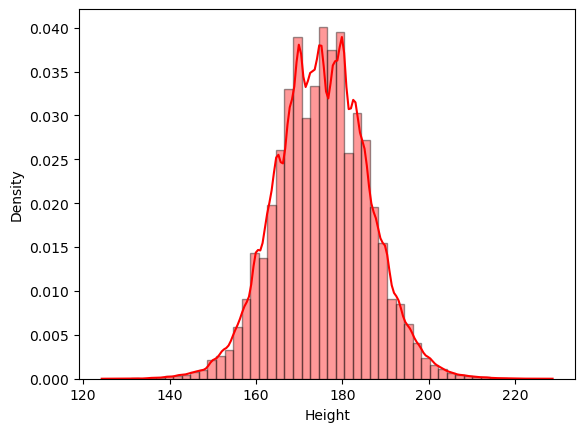

In [10]:
sns.distplot(df['Height'].dropna(),color='red',hist_kws=dict(edgecolor='black'));

<AxesSubplot:xlabel='Weight', ylabel='Density'>

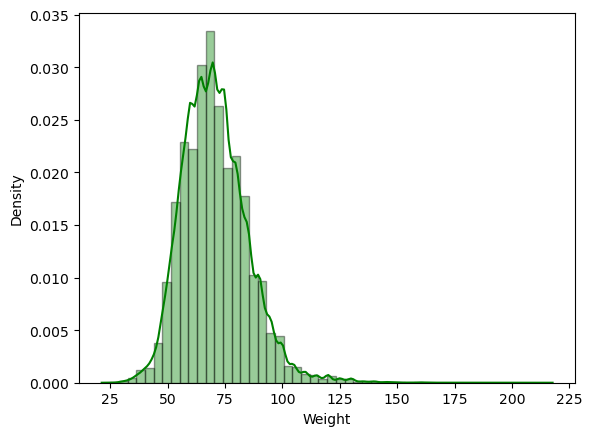

In [11]:
sns.distplot(df['Weight'].dropna(),color='green',hist_kws=dict(edgecolor='black'))

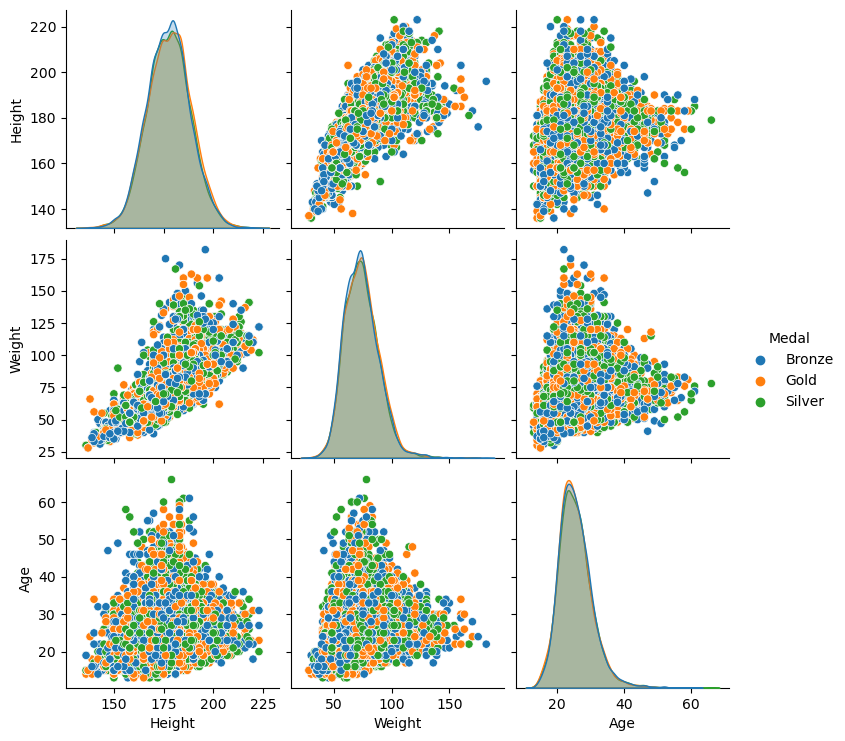

In [12]:
sns.pairplot(df[['Height','Weight','Age','Medal']].dropna(),hue='Medal')

<AxesSubplot:>

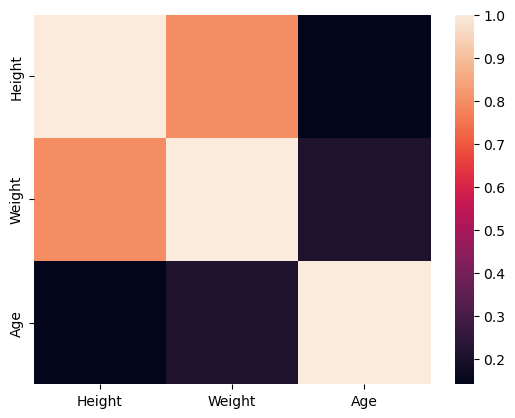

In [14]:
sns.heatmap(df[['Height','Weight','Age']].dropna().corr())

<AxesSubplot:>

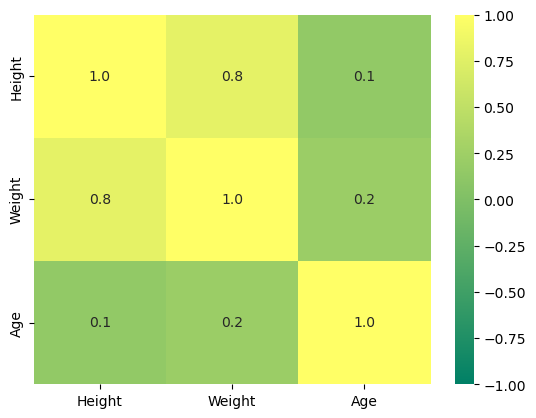

In [16]:
sns.heatmap(df[['Height','Weight','Age']].dropna().corr(),vmin=-1,vmax=1,annot=True,cmap='summer',fmt='.1f')

In [19]:
df_meadal=df[['Team','Medal']].groupby('Team',as_index=False).agg({'Medal':'count'}).sort_values('Medal',ascending=False).head(20)

In [21]:
df_meadal

,Team,Medal
1095,United States,5219
976,Soviet Union,2451
398,Germany,1984
412,Great Britain,1673
361,France,1550
506,Italy,1527
1010,Sweden,1434
65,Australia,1306
173,Canada,1243
476,Hungary,1127


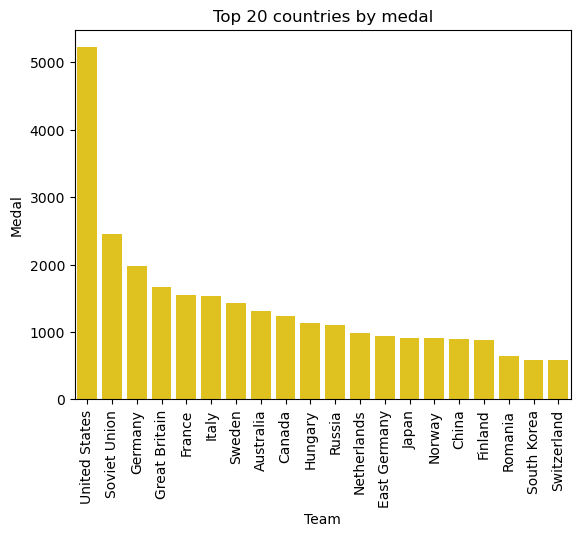

In [22]:
sns.barplot(x='Team',y='Medal',data=df_meadal,color='gold')
plt.xticks(rotation=90)
plt.title("Top 20 countries by medal");

In [23]:
df_g=df[df['Medal']=='Gold']
df_s=df[df['Medal']=='Silver']
df_b=df[df['Medal']=='Bronze']

In [24]:
df_medal_g=df_g[['Team','Medal']].groupby('Team',as_index=False).agg({'Medal':'count'}).sort_values('Medal',ascending=False).head(20)
df_medal_s=df_s[['Team','Medal']].groupby('Team',as_index=False).agg({'Medal':'count'}).sort_values('Medal',ascending=False).head(20)
df_medal_b=df_b[['Team','Medal']].groupby('Team',as_index=False).agg({'Medal':'count'}).sort_values('Medal',ascending=False).head(20)

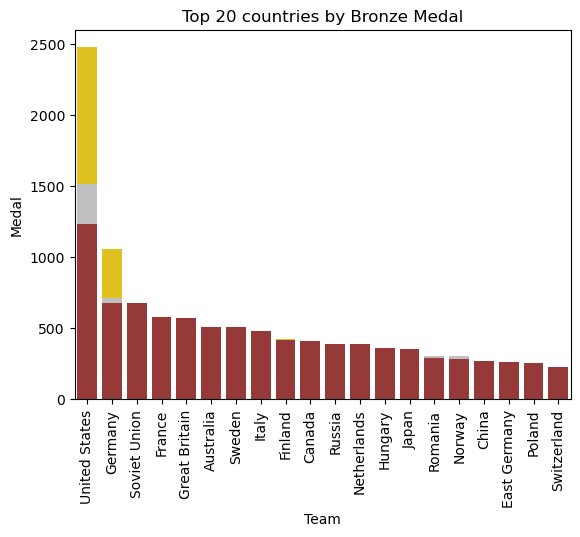

In [27]:
sns.barplot(x='Team',y='Medal',data=df_medal_g,color='gold');
plt.xticks(rotation=90);
plt.title('Top 20 countries by Gold Medal');

sns.barplot(x='Team',y='Medal',data=df_medal_s,color='silver');
plt.xticks(rotation=90);
plt.title('Top 20 countries by Silver Medal');

sns.barplot(x='Team',y='Medal',data=df_medal_b,color='brown');
plt.xticks(rotation=90);
plt.title('Top 20 countries by Bronze Medal');


In [74]:
top20=df_meadal['Team']

In [75]:

df_g_t=df[(df['Medal']=='Gold')&(df['Team'].isin(top20))]
df_s_t=df[(df['Medal']=='Silver')&(df['Team'].isin(top20))]
df_b_t=df[(df['Medal']=='Bronze')&(df['Team'].isin(top20))]

In [76]:
df_medal_g_t=df_g_t[['Team','Medal']].groupby('Team',as_index=False).agg({'Medal':'count'}).sort_values('Medal',ascending=False)
df_medal_s_t=df_s_t[['Team','Medal']].groupby('Team',as_index=False).agg({'Medal':'count'}).sort_values('Medal',ascending=False)
df_medal_b_t=df_b_t[['Team','Medal']].groupby('Team',as_index=False).agg({'Medal':'count'}).sort_values('Medal',ascending=False)

In [77]:
df_g_t

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold
73,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Super G,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270934,135488,Nataliya Vladimirovna Zuyeva,F,19.0,176.0,62.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Group,Gold
271009,135520,Julia Zwehl,F,28.0,167.0,60.0,Germany,GER,2004 Summer,2004,Summer,Athina,Hockey,Hockey Women's Hockey,Gold
271016,135523,"Ronald Ferdinand ""Ron"" Zwerver",M,29.0,200.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Volleyball,Volleyball Men's Volleyball,Gold
271049,135545,Henk Jan Zwolle,M,31.0,197.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Coxed Eights,Gold


In [78]:
df_g_t

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold
73,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Super G,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270934,135488,Nataliya Vladimirovna Zuyeva,F,19.0,176.0,62.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Group,Gold
271009,135520,Julia Zwehl,F,28.0,167.0,60.0,Germany,GER,2004 Summer,2004,Summer,Athina,Hockey,Hockey Women's Hockey,Gold
271016,135523,"Ronald Ferdinand ""Ron"" Zwerver",M,29.0,200.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Volleyball,Volleyball Men's Volleyball,Gold
271049,135545,Henk Jan Zwolle,M,31.0,197.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Coxed Eights,Gold


In [79]:
df_medal_b_t

,Team,Medal
19,United States,1233
6,Germany,678
16,Soviet Union,677
5,France,577
7,Great Britain,572
0,Australia,511
17,Sweden,507
9,Italy,484
4,Finland,415
1,Canada,408


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'Germany'),
  Text(2, 0, 'Soviet Union'),
  Text(3, 0, 'France'),
  Text(4, 0, 'Great Britain'),
  Text(5, 0, 'Australia'),
  Text(6, 0, 'Sweden'),
  Text(7, 0, 'Italy'),
  Text(8, 0, 'Finland'),
  Text(9, 0, 'Canada'),
  Text(10, 0, 'Russia'),
  Text(11, 0, 'Netherlands'),
  Text(12, 0, 'Hungary'),
  Text(13, 0, 'Japan'),
  Text(14, 0, 'Romania'),
  Text(15, 0, 'Norway'),
  Text(16, 0, 'China'),
  Text(17, 0, 'East Germany'),
  Text(18, 0, 'Switzerland'),
  Text(19, 0, 'South Korea')])

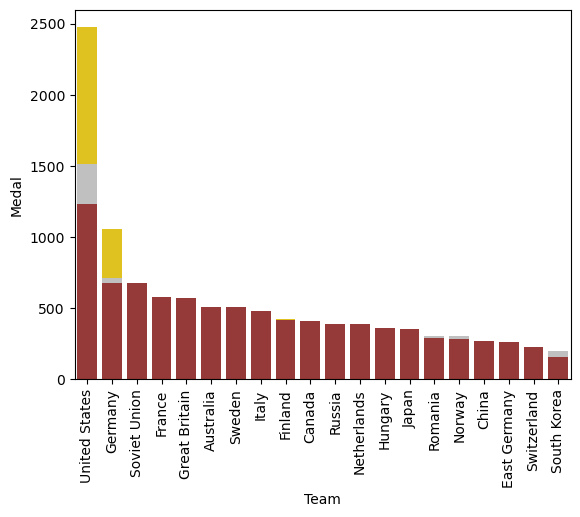

In [80]:
sns.barplot(x='Team',y='Medal',data=df_medal_g_t,color='gold')
plt.xticks(rotation=90)
sns.barplot(x='Team',y='Medal',data=df_medal_s_t,color='silver')
plt.xticks(rotation=90)
sns.barplot(x='Team',y='Medal',data=df_medal_b_t,color='brown')
plt.xticks(rotation=90)

In [81]:
df1=df_medal_g_t['Team']
dfs=df_medal_s_t['Medal']
dfb=df_medal_b_t['Medal']
dfg=df_medal_g_t['Medal']

In [82]:
stacked_df=pd.DataFrame({'Team':df1,'Gold':dfg,'Silver':dfs,'Bronze':dfb})

In [83]:
stacked_df

,Team,Gold,Silver,Bronze
0,Australia,342,453,511
1,Canada,422,413,408
2,China,308,325,268
3,East Germany,369,309,263
4,Finland,198,263,415
5,France,455,518,577
6,Germany,679,627,678
7,Great Britain,519,582,572
8,Hungary,432,330,365
9,Italy,535,508,484


In [84]:
stacked_df=stacked_df.sort_values('Gold',ascending=False)
stacked_df

,Team,Gold,Silver,Bronze
19,United States,2474,1512,1233
16,Soviet Union,1058,716,677
6,Germany,679,627,678
9,Italy,535,508,484
7,Great Britain,519,582,572
5,France,455,518,577
17,Sweden,451,476,507
8,Hungary,432,330,365
1,Canada,422,413,408
3,East Germany,369,309,263


<AxesSubplot:xlabel='Team'>

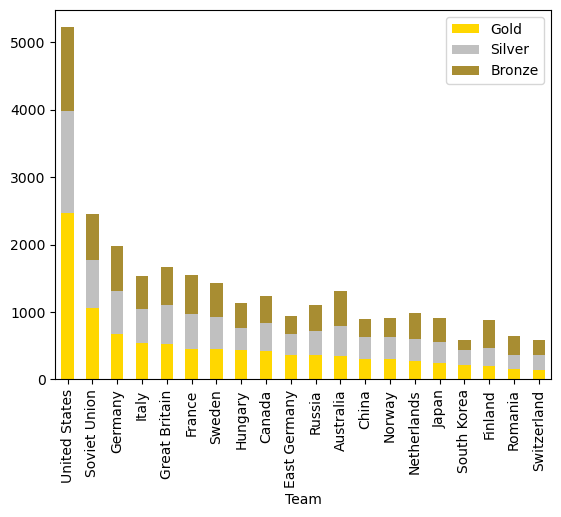

In [85]:
stacked_df.set_index('Team').plot(kind='bar',stacked=True,color=['Gold','Silver','#a88d32'])

In [86]:
stacked_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 19 to 18
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Team    20 non-null     object
 1   Gold    20 non-null     int64 
 2   Silver  20 non-null     int64 
 3   Bronze  20 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 800.0+ bytes


In [87]:
df_India=df[df['Team']=='India']

In [88]:
df_India

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264139,132177,Mohammad Anas Yahiya,M,21.0,177.0,69.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 4 x 400 metres Relay,NaN
265876,133029,"Thyadathuvilla Chandrapillai ""T. C."" Yohannan",M,29.0,174.0,62.0,India,IND,1976 Summer,1976,Summer,Montreal,Athletics,Athletics Men's Long Jump,NaN
266934,133554,Sayed Muhammad Yusuf,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold
270912,135480,Geeta Zutshi,F,23.0,167.0,51.0,India,IND,1980 Summer,1980,Summer,Moskva,Athletics,Athletics Women's 800 metres,NaN


In [90]:
df_medal_india=df_India[['Medal','Year']].groupby('Year',as_index=False).agg({'Medal':'count'})

In [91]:
df_medal_india

,Year,Medal
0,1900,2
1,1920,0
2,1924,7
3,1928,14
4,1932,15
5,1936,19
6,1948,20
7,1952,15
8,1956,17
9,1960,13


Text(0.5, 1.0, 'Medal earn by India per Year')

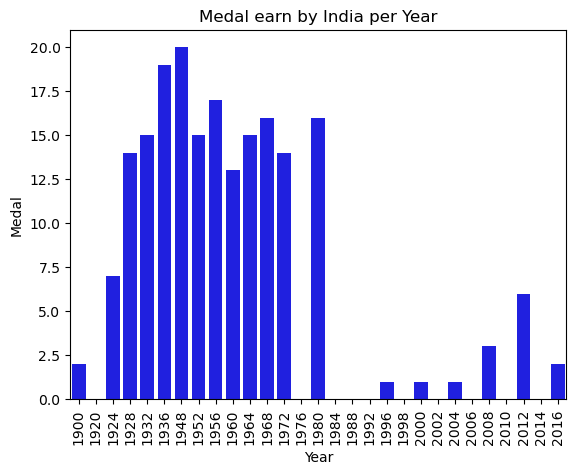

In [93]:
sns.barplot(x='Year',y='Medal',data=df_medal_india,color='Blue')
plt.xticks(rotation=90)
plt.title("Medal earn by India per Year")